In [35]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

# Đọc dữ liệu

In [71]:
df_playlists = pd.read_csv('playlist.csv')

In [72]:
df_playlists

,playlist_id,playlist_name,playlist_url,owner_id,username,playlist_time,playlist_tag,like,repost,size,tracks
0,0,Lat3 Nit3,https://www.soundcloud.com/latenit3/sets/lat3-...,1893,Latenit3,2017-04-21T12:05:32.000Z,NaN,20,3,0,[]
1,1,lofi 4 studying,https://www.soundcloud.com/suricolbert/sets/lo...,1894,suri,2017-02-20T01:17:24.000Z,Hip-hop & Rap,210,8318,86,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,2,Lowfi hip hop chills,https://www.soundcloud.com/nuedenk/sets/lowfi-...,1895,Nix,2017-03-10T07:58:45.000Z,Lofi Hip Hop,203,20,135,"[86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 9..."
3,3,Late Night Drive,https://www.soundcloud.com/lordafi/sets/sweg,1896,TMN Playlisted,2014-07-21T07:00:32.000Z,Dance & EDM,75,5122,45,"[219, 220, 221, 222, 223, 224, 225, 226, 227, ..."
4,4,Late Night Lofi,https://www.soundcloud.com/ilyanaazman/sets/la...,1897,Ilyana Azman,2017-08-14T13:00:19.000Z,NaN,48,2372,40,"[264, 265, 266, 267, 57, 268, 269, 270, 271, 2..."
...,...,...,...,...,...,...,...,...,...,...,...
304,304,80'an,https://www.soundcloud.com/pbgcheat/sets/80an,2160,Lagu Lawas Indonesia 90an,2016-09-07T12:32:43.000Z,NaN,745,123,0,[]
305,305,8lyaaaa,https://www.soundcloud.com/user374368488/sets/...,2161,user374368488,2014-05-13T18:45:50.000Z,NaN,0,0,282,"[25853, 25854, 25855, 25856, 25857, 25858, 258..."
306,306,88388,https://www.soundcloud.com/shamma-alfahim-1302...,2162,XSF9,2020-08-19T20:49:00.000Z,NaN,6,0,205,"[26075, 26076, 26077, 26078, 12021, 26079, 121..."
307,307,80s arabic,https://www.soundcloud.com/mito-mito-715670362...,2163,Mito Mito,2017-03-09T18:56:39.000Z,NaN,41,2,303,"[11605, 11597, 12750, 11667, 12887, 11568, 116..."


Dữ liệu có 309 dòng và 11 cột

# Ý nghĩa các cột
- playlist_id: mã định danh playlist
- playlist_name: tên playlist
- playlist_url: đường dẫn đến playlist
- owner_id: mã chủ sở hữu playlist
- username: tên chủ sở hữu
- playlist_time: ngày xuất bản
- playlist_tag: thể loại của playlist
- like: số lượt thích
- repost: số lượng đăng lại
- size: số lượng các track trong playlist
- tracks: các track trong playlist

# Kiểu dữ liệu các cột

In [73]:
df_playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   playlist_id    309 non-null    int64 
 1   playlist_name  309 non-null    object
 2   playlist_url   309 non-null    object
 3   owner_id       309 non-null    int64 
 4   username       309 non-null    object
 5   playlist_time  309 non-null    object
 6   playlist_tag   70 non-null     object
 7   like           309 non-null    int64 
 8   repost         309 non-null    int64 
 9   size           309 non-null    int64 
 10  tracks         309 non-null    object
dtypes: int64(5), object(6)
memory usage: 26.7+ KB


- Cột playlist_time phải có kiểu dữ liệu là datetime thay vì object.

# Các thông số cơ bản của các cột

In [74]:
df_playlists.describe()

,playlist_id,owner_id,like,repost,size
count,309.000000,309.000000,309.000000,309.000000,309.000000
mean,154.000000,1944.207120,561.110032,496.792880,110.317152
std,89.344838,345.646856,1683.387834,1409.731418,149.263918
min,0.000000,124.000000,0.000000,0.000000,0.000000
25%,77.000000,1948.000000,2.000000,0.000000,5.000000
50%,154.000000,2013.000000,16.000000,2.000000,21.000000
75%,231.000000,2090.000000,113.000000,90.000000,216.000000
max,308.000000,2164.000000,9808.000000,9193.000000,500.000000


# Dữ liệu có bị duplicate không ?

In [75]:
num_duplicated_rows = df_playlists.index.duplicated().sum()
print(num_duplicated_rows)

0


- Trong dataframe không có dữ liệu bị trùng lắp

# Dữ liệu có bị mất không ? 

In [76]:
df_playlists.isnull().sum()

playlist_id        0
playlist_name      0
playlist_url       0
owner_id           0
username           0
playlist_time      0
playlist_tag     239
like               0
repost             0
size               0
tracks             0
dtype: int64

Cột playlist_tag bị mất dữ liệu

# Xử lý missing 

In [77]:
df_playlists = df_playlists.fillna("Missing")

In [78]:
df_playlists.isnull().sum()

playlist_id      0
playlist_name    0
playlist_url     0
owner_id         0
username         0
playlist_time    0
playlist_tag     0
like             0
repost           0
size             0
tracks           0
dtype: int64

Missing đã được xử lý

# Data Outliers

- 3 cột được kiểm tra là: repost, like và size: 

- Cột repost

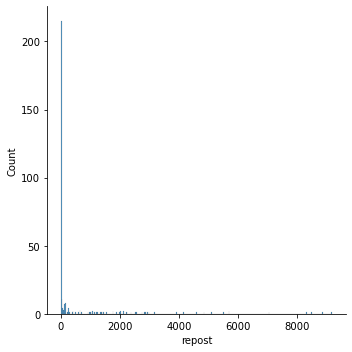

In [79]:
sns.displot(df_playlists['repost'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='repost'>

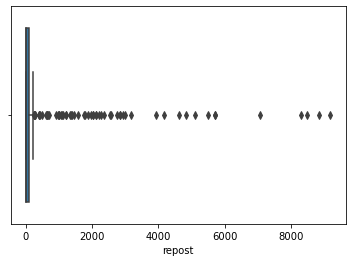

In [80]:
sns.boxplot(df_playlists['repost'])

In [81]:
upper_limit = df_playlists['repost'].mean() + 3 * df_playlists['repost'].std()
lower_limit = df_playlists['repost'].mean() - 3 * df_playlists['repost'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 4725.987134632958
lower limit: -3732.4013741151593


In [82]:
# find ouliers
df_playlists.loc[(df_playlists['repost'] > upper_limit) | (df_playlists['repost'] < lower_limit)]

,playlist_id,playlist_name,playlist_url,owner_id,username,playlist_time,playlist_tag,like,repost,size,tracks
1,1,lofi 4 studying,https://www.soundcloud.com/suricolbert/sets/lo...,1894,suri,2017-02-20T01:17:24.000Z,Hip-hop & Rap,210,8318,86,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,3,Late Night Drive,https://www.soundcloud.com/lordafi/sets/sweg,1896,TMN Playlisted,2014-07-21T07:00:32.000Z,Dance & EDM,75,5122,45,"[219, 220, 221, 222, 223, 224, 225, 226, 227, ..."
23,23,Piano Deep Concentration,https://www.soundcloud.com/nitza-md/sets/piano...,1915,Nitza Md,2016-04-07T10:38:15.000Z,Classical,161,8498,50,"[503, 504, 505, 506, 507, 508, 509, 510, 511, ..."
24,24,pre work out 2017,https://www.soundcloud.com/user154907890/sets/...,1916,Raz,2017-01-28T10:09:12.000Z,Missing,132,7066,12,"[553, 554, 555, 556, 557, 558, 559, 560, 561, ..."
41,41,Sunday laziness and sunset views,https://www.soundcloud.com/user-876658341/sets...,1932,Omar,2018-01-16T10:03:49.000Z,Missing,123,8854,58,"[865, 866, 867, 868, 869, 870, 871, 872, 873, ..."
43,43,Sleep healing sounds,https://www.soundcloud.com/jean-claude-4/sets/...,1934,Jean Claude 5,2015-11-26T01:16:15.000Z,Missing,86,4846,15,"[925, 926, 927, 928, 929, 930, 931, 932, 933, ..."
128,128,meditation,https://www.soundcloud.com/rehan-khan-55/sets/...,1996,Rehan Khan 55,2017-01-04T18:20:57.000Z,Missing,154,9193,12,"[4148, 4149, 4150, 4151, 4152, 4153, 4154, 415..."
136,136,"Members Only, Vol.2",https://www.soundcloud.com/members-only666/set...,2002,Members Only,2015-10-31T12:56:32.000Z,xxx,72,5703,20,"[4239, 4240, 4241, 4242, 4243, 4244, 4245, 424..."
137,137,Members Only Vol.1!,https://www.soundcloud.com/brainbakerymag/sets...,2003,Brain Bakery,2015-04-20T22:57:29.000Z,Missing,70,5705,2,"[4259, 4260]"
168,168,Mohamed Mounir محمد منير,https://www.soundcloud.com/annmagdy/sets/moham...,2033,Ann Magdy,2013-06-19T08:21:59.000Z,Mohamed,26,5512,148,"[5594, 5595, 5596, 5597, 5598, 5599, 5600, 560..."


In [83]:
#remove outliers
df_playlists_new = df_playlists.loc[(df_playlists['repost'] <= upper_limit) & (df_playlists['repost'] >= lower_limit)]
print('Before remove outliers:', len(df_playlists))
print('After remove outliers:',len(df_playlists_new))
print('outliers:', len(df_playlists)-len(df_playlists_new))

Before remove outliers: 309
After remove outliers: 299
outliers: 10


- Cột like

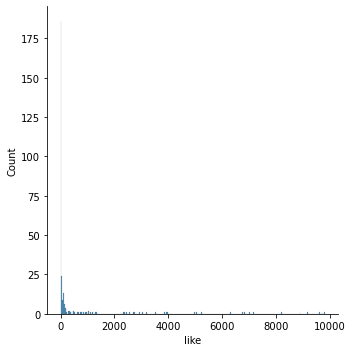

In [84]:
sns.displot(df_playlists_new['like'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='like'>

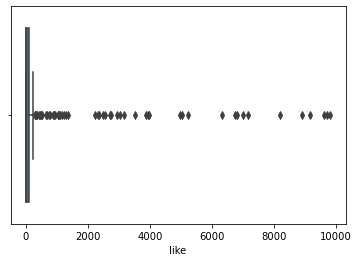

In [85]:
sns.boxplot(df_playlists_new['like'])

In [86]:
# find the limits
upper_limit = df_playlists_new['like'].mean() + 3*df_playlists_new['like'].std()
lower_limit = df_playlists_new['like'].mean() - 3*df_playlists_new['like'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 5704.121524894466
lower limit: -4551.787076733932


In [87]:
# find outliers
df_playlists_new.loc[(df_playlists_new['like'] > upper_limit) | (df_playlists_new['like'] < lower_limit)]

,playlist_id,playlist_name,playlist_url,owner_id,username,playlist_time,playlist_tag,like,repost,size,tracks
45,45,sertanejo,https://www.soundcloud.com/maycon-amaral-reis/...,1936,Maycon Amaral Reis,2016-10-05T12:19:51.000Z,Missing,6741,646,58,"[950, 951, 952, 953, 954, 955, 956, 957, 958, ..."
84,84,Solar System & Beyond Sounds,https://www.soundcloud.com/nasa/sets/solar-sys...,521,NASA,2014-10-16T19:37:22.000Z,nasa,7003,1009,27,"[1253, 1738, 1739, 1740, 1252, 1249, 1251, 125..."
100,100,The best of Nusrat - vol1,https://www.soundcloud.com/nusrat-fateh-ali-kh...,538,Nusrat Fateh Ali Khan,2013-06-07T01:36:49.000Z,Qawali,7172,1196,5,"[2733, 2734, 2735, 2736, 2737]"
104,104,TalkToMeInKorean Level 1,https://www.soundcloud.com/talktomeinkorean/se...,864,TalkToMeInKorean,2013-01-23T08:58:51.000Z,Education,9808,918,26,"[2776, 2777, 2778, 2779, 2780, 2781, 2782, 278..."
110,110,These sounds FREE YOU FROM anxiety AND cultiva...,https://www.soundcloud.com/relaxmeditation/set...,1980,Relax-Meditation Music :),2013-11-17T12:51:00.000Z,Pop,8895,1780,9,"[2853, 615, 2854, 2855, 2856, 2857, 2858, 2859..."
134,134,Mindfulness: A practical guide to finding peac...,https://www.soundcloud.com/hachetteaudiouk/set...,182,Hachette Audio UK,2016-10-25T10:53:47.000Z,Audiobooks,8190,258,10,"[4218, 4219, 4220, 4221, 4222, 4223, 4224, 422..."
161,161,Music Is Elation - Hip Hops Reincarnation Vol....,https://www.soundcloud.com/music-is-elation/se...,2026,Music Is Elation,2016-01-17T16:09:02.000Z,Hip Hop,9605,2258,28,"[4821, 4822, 1357, 4823, 4824, 4825, 4826, 482..."
167,167,Maybe I Was Boring,https://www.soundcloud.com/wilbur-soot/sets/ma...,2032,wilbur,2019-12-28T00:07:33.000Z,Folk & Singer-Songwriter,6805,261,3,"[5591, 5592, 5593]"
203,203,reFresh Playlist,https://www.soundcloud.com/coors-light/sets/re...,2063,Coors Light,2015-12-16T14:05:21.000Z,Missing,9695,3169,10,"[7695, 7696, 7697, 7698, 7699, 7700, 7701, 770..."
217,217,𝙍𝙀𝙈𝙄𝙓𝙀𝙎 𝙊𝙁 𝙋𝙊𝙋𝙐𝙇𝘼𝙍 𝙎𝙊𝙉𝙂𝙎,https://www.soundcloud.com/hardstyle-zyzz/sets...,2076,𝙃𝘼𝙍𝘿𝙎𝙏𝙔𝙇𝙀,2018-05-30T02:07:05.000Z,Missing,9162,221,211,"[7445, 7448, 7449, 7447, 9342, 7450, 3394, 339..."


In [88]:
#remove outliers
df_playlists_neww = df_playlists_new.loc[(df_playlists_new['like'] <= upper_limit) & (df_playlists_new['like'] >= lower_limit)]
print('Before remove outliers:', len(df_playlists_new))
print('After remove outliers:',len(df_playlists_neww))
print('outliers:', len(df_playlists_new)-len(df_playlists_neww))

Before remove outliers: 299
After remove outliers: 288
outliers: 11


In [89]:
df_playlists_neww.head(5)

,playlist_id,playlist_name,playlist_url,owner_id,username,playlist_time,playlist_tag,like,repost,size,tracks
0,0,Lat3 Nit3,https://www.soundcloud.com/latenit3/sets/lat3-...,1893,Latenit3,2017-04-21T12:05:32.000Z,Missing,20,3,0,[]
2,2,Lowfi hip hop chills,https://www.soundcloud.com/nuedenk/sets/lowfi-...,1895,Nix,2017-03-10T07:58:45.000Z,Lofi Hip Hop,203,20,135,"[86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 9..."
4,4,Late Night Lofi,https://www.soundcloud.com/ilyanaazman/sets/la...,1897,Ilyana Azman,2017-08-14T13:00:19.000Z,Missing,48,2372,40,"[264, 265, 266, 267, 57, 268, 269, 270, 271, 2..."
5,5,lounge music,https://www.soundcloud.com/user437403782/sets/...,1898,user437403782,2013-08-23T14:37:55.000Z,Missing,857,50,4,"[302, 303, 304, 305]"
6,6,lazy lamhi,https://www.soundcloud.com/merna-hany-16075247...,1899,Merna Hany,2017-04-30T18:45:05.000Z,Missing,1,2,4,"[306, 307, 308, 309]"


- size

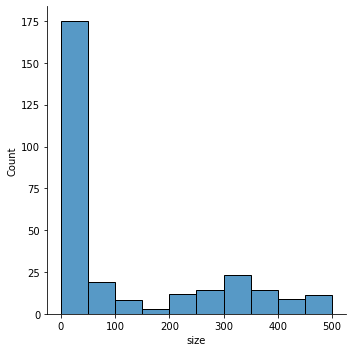

In [90]:
sns.displot(df_playlists_neww['size'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size'>

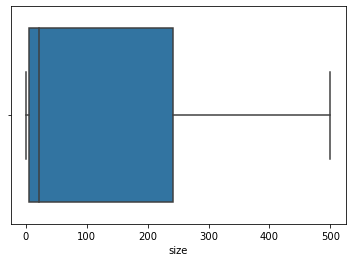

In [91]:
sns.boxplot(df_playlists_neww['size'])

In [92]:
# find the limits
upper_limit = df_playlists_neww['size'].mean() + 3 * df_playlists_neww['size'].std()
lower_limit = df_playlists_neww['size'].mean() - 3 * df_playlists_neww['size'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 573.6607196246536
lower limit: -342.75099740243127


In [93]:
#find outliers
df_playlists_neww.loc[(df_playlists_neww['size'] > upper_limit) | (df_playlists_neww['size'] < lower_limit)]

,playlist_id,playlist_name,playlist_url,owner_id,username,playlist_time,playlist_tag,like,repost,size,tracks


In [94]:
df_playlists_neww.shape

(288, 11)

# Quan sát số lượt like của các playlist

<AxesSubplot:title={'center':'Biểu đồ phân bố số lượt like của các playlist'}, xlabel='like', ylabel='Count'>

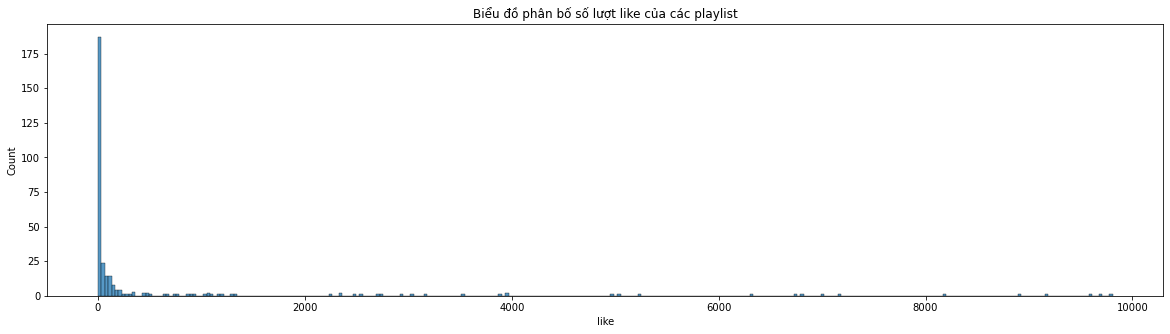

In [95]:
plt.figure(figsize=(20,5))
plt.title("Biểu đồ phân bố số lượt like của các playlist")
sns.histplot(data=df_playlists, x='like')

Ta có thể quan sát được số lượng lượt thích đa số nằm ở khu vực dưới 2000 , vậy nên số lượng playlists có lượt thích (like) cao là không nhiều.

# Top 5 playlist có lượt thích cao nhất 

In [119]:
df = df_playlists.sort_values('like',ascending=False)
df.head(5)

,playlist_id,playlist_name,playlist_url,owner_id,username,playlist_time,playlist_tag,like,repost,size,tracks
104,104,TalkToMeInKorean Level 1,https://www.soundcloud.com/talktomeinkorean/se...,864,TalkToMeInKorean,2013-01-23T08:58:51.000Z,Education,9808,918,26,"[2776, 2777, 2778, 2779, 2780, 2781, 2782, 278..."
203,203,reFresh Playlist,https://www.soundcloud.com/coors-light/sets/re...,2063,Coors Light,2015-12-16T14:05:21.000Z,Missing,9695,3169,10,"[7695, 7696, 7697, 7698, 7699, 7700, 7701, 770..."
161,161,Music Is Elation - Hip Hops Reincarnation Vol....,https://www.soundcloud.com/music-is-elation/se...,2026,Music Is Elation,2016-01-17T16:09:02.000Z,Hip Hop,9605,2258,28,"[4821, 4822, 1357, 4823, 4824, 4825, 4826, 482..."
217,217,𝙍𝙀𝙈𝙄𝙓𝙀𝙎 𝙊𝙁 𝙋𝙊𝙋𝙐𝙇𝘼𝙍 𝙎𝙊𝙉𝙂𝙎,https://www.soundcloud.com/hardstyle-zyzz/sets...,2076,𝙃𝘼𝙍𝘿𝙎𝙏𝙔𝙇𝙀,2018-05-30T02:07:05.000Z,Missing,9162,221,211,"[7445, 7448, 7449, 7447, 9342, 7450, 3394, 339..."
110,110,These sounds FREE YOU FROM anxiety AND cultiva...,https://www.soundcloud.com/relaxmeditation/set...,1980,Relax-Meditation Music :),2013-11-17T12:51:00.000Z,Pop,8895,1780,9,"[2853, 615, 2854, 2855, 2856, 2857, 2858, 2859..."


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 120397 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 120384 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 120392 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 120388 (\N{MATHEMATICAL SANS-SERIF BOLD ITALIC CAPITAL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 120403 (\N{MATHEMA

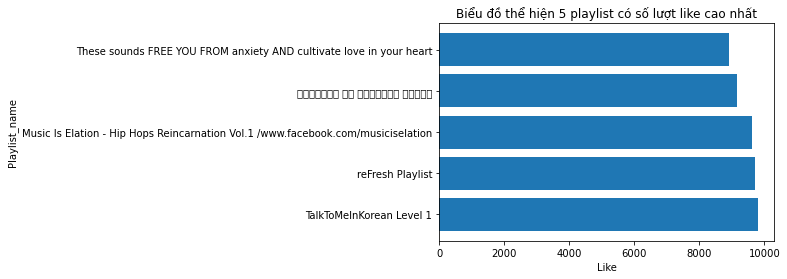

In [118]:
df_5like=df.head(5)
plt.barh(df_5like['playlist_name'],df_5like['like'], align='center', alpha=1)
plt.xlabel('Like')
plt.ylabel('Playlist_name')
plt.title('Biểu đồ thể hiện 5 playlist có số lượt like cao nhất')
plt.show()

# Quan sát số lượt repost của các playlist

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Biểu đồ phân bố số lượt repost của các playlist'}, xlabel='repost', ylabel='Density'>

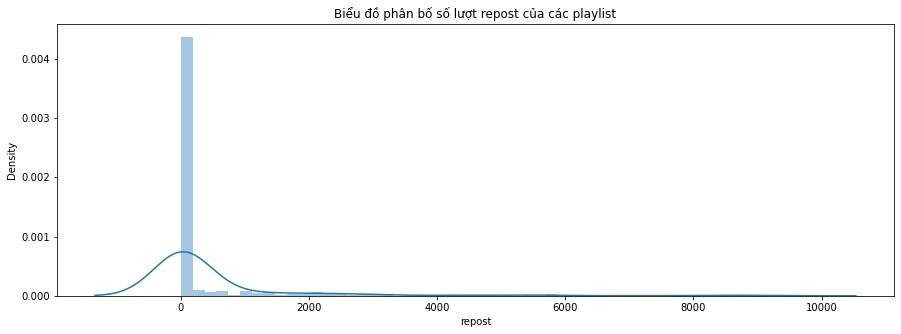

In [101]:
plt.figure(figsize=(15,5))
plt.title("Biểu đồ phân bố số lượt repost của các playlist")
sns.distplot(df_playlists["repost"])

# Top 5 playlist có nhiều lượt repost nhất 

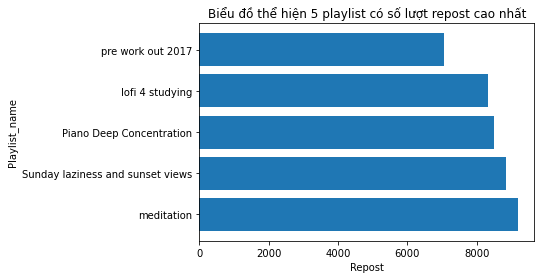

In [120]:
df=df_playlists.sort_values('repost',ascending=False)
df_5repost=df.head(5)
plt.barh(df_5repost['playlist_name'],df_5repost['repost'], align='center', alpha=1)
plt.xlabel('Repost')
plt.ylabel('Playlist_name')
plt.title('Biểu đồ thể hiện 5 playlist có số lượt repost cao nhất')
plt.show()

# Mối quan hệ giữa số lượng track, lượt like, repost

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Phân bố số lượng bài hát trong playlist'}, xlabel='size', ylabel='Density'>

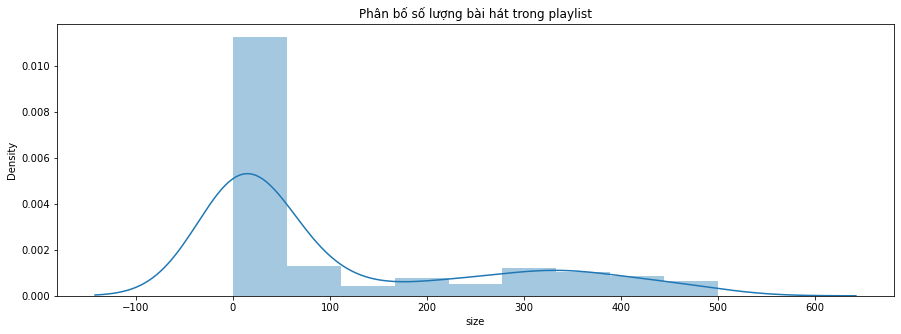

In [121]:
plt.figure(figsize=(15,5))
plt.title("Phân bố số lượng bài hát trong playlist")
sns.distplot(df_playlists["size"])

Bên trên ta xem phân bố số lượng bài hát trong các playlists như thế nào. Tiếp theo, ta xem có bất kì mối quan hệ gì không so với các biến như lượt thích (like) và phát lại (repost).

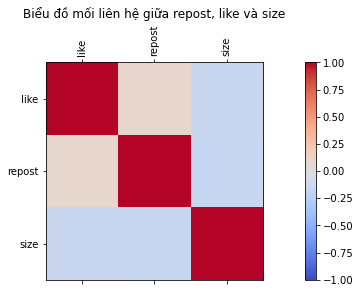

In [122]:
h2 = df_playlists[['like', 'repost', 'size']]
corr = h2.corr()
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(h2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(h2.columns)
ax.set_yticklabels(h2.columns)
plt.title("Biểu đồ mối liên hệ giữa repost, like và size")
plt.show()

Ta có thể thấy số lượng track trong playlist hoàn toàn không ảnh hưởng đến các chỉ số khác 

# playlist_time phân bố như thế nào?

In [123]:
dates = df_playlists['playlist_time'].squeeze()
dates = pd.to_datetime(dates, format='%Y-%m-%d %H:%M:%S')
years = dates.dt.year

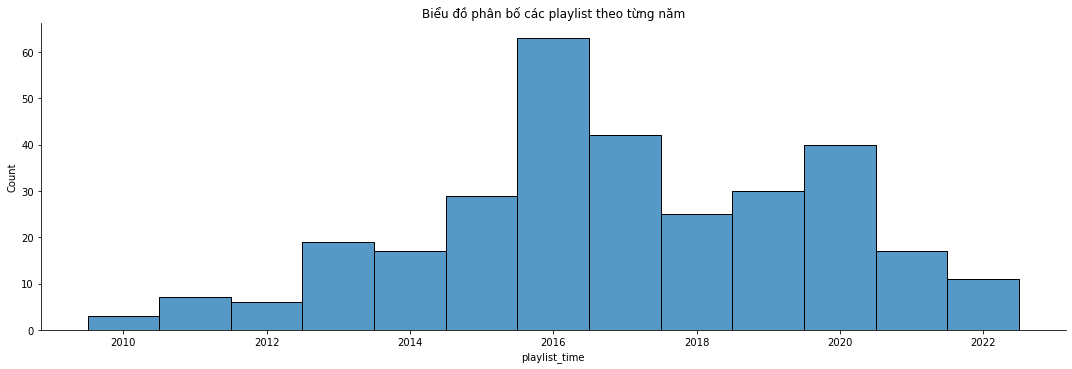

In [124]:
sns.displot(years, discrete=True, aspect=3)
plt.title('Biểu đồ phân bố các playlist theo từng năm')
plt.show()

- Số lượng playlist xuất hiện lần đầu vào khoảng 2010 sau đó có xu hương tăng mạnh và đạt đỉnh vào năm 2016 sau đó có xu hướng giảm dần

# Số lượt thích theo từng năm

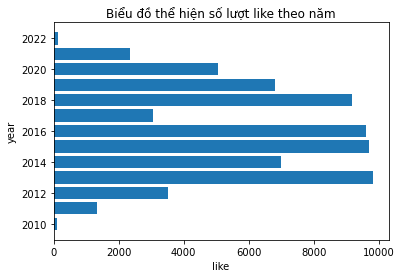

In [125]:
plt.barh(years,df_playlists['like'], align='center', alpha=1)
plt.xlabel('like')
plt.ylabel('year')
plt.title('Biểu đồ thể hiện số lượt like theo năm')
plt.show()

- Biểu đồ cho thấy số lượt like cao nhất trong các năm 2013 và thấp nhất vào 2010